In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

from env import host, user, password
from wrangle import wrangle_telco
import split_scale

In [2]:
# acquire data and remove null values 
df = wrangle_telco()

# split into train and test
train, test = split_scale.split_my_data(df, .8)

In [3]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
283,1764-VUUMT,19.95,66,1269.10
519,3190-ITQXP,20.25,46,890.35
729,4513-CXYIX,80.70,71,5676.00
1240,7359-SSBJK,70.20,64,4481.00
735,4568-KNYWR,63.25,52,3342.45


In [4]:
test.head()

,customer_id,monthly_charges,tenure,total_charges
683,4102-HLENU,65.65,67,4322.85
549,3359-DSRKA,19.85,58,1158.85
1105,6621-NRZAK,20.00,63,1209.25
1684,9938-TKDGL,99.55,68,6668.00
869,5271-YNWVR,113.15,68,7856.00


In [5]:
train.shape

(1356, 4)

In [6]:
test.shape

(339, 4)

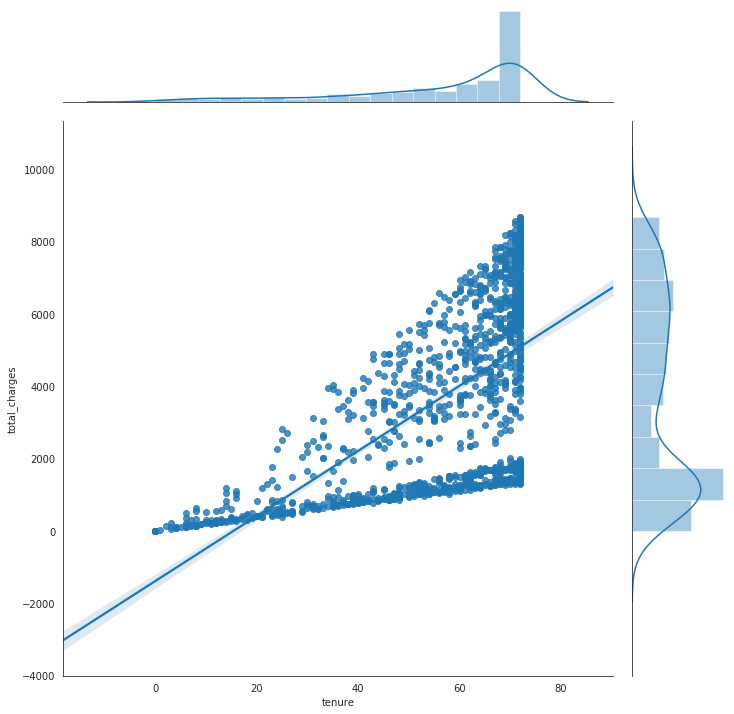

In [9]:
with sns.axes_style('white'):
    j = sns.jointplot("tenure", "total_charges", data=train, kind='reg', height=10);
plt.show()

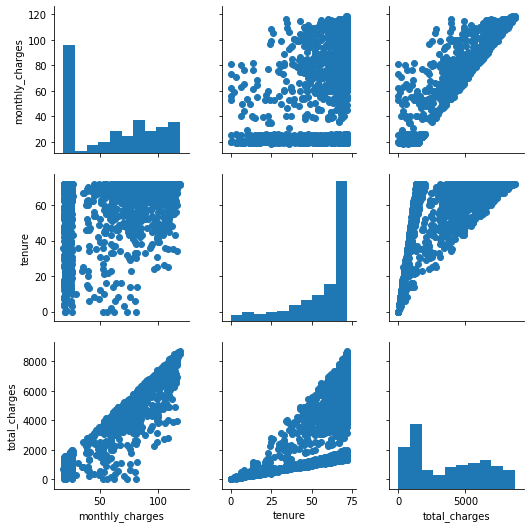

In [44]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

(0, 4)

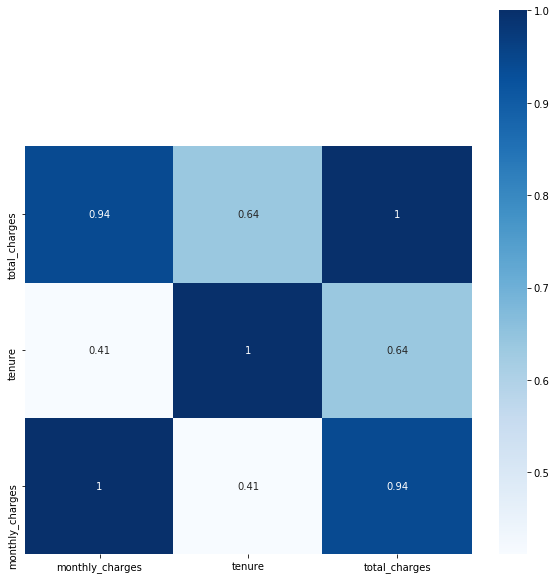

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.ylim(0, 4)

In [36]:
def plot_variable_pairs(df):
    g = sns.pairplot(train)
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter);

In [41]:
def plot_variable_pairs(dataframe):
    train, test = split_scale.split_my_data(dataframe, .8)
    g = sns.PairGrid(train)
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter);

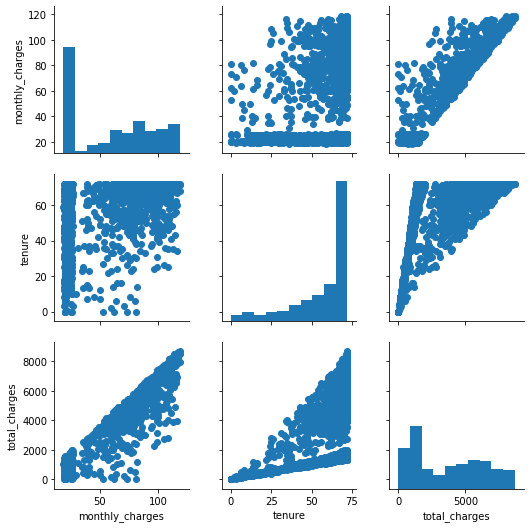

In [42]:
plot_variable_pairs(df)

In [45]:
df

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40
1691,9972-EWRJS,19.25,67,1372.90
1692,9975-GPKZU,19.75,46,856.50
1693,9993-LHIEB,67.85,67,4627.65


In [46]:
df['tenure_years'] = df.tenure / 12

In [47]:
df

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,5.916667
1,0014-BMAQU,84.65,63,5377.80,5.250000
2,0016-QLJIS,90.45,65,5957.90,5.416667
3,0017-DINOC,45.20,54,2460.55,4.500000
4,0017-IUDMW,116.80,72,8456.75,6.000000
...,...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40,5.916667
1691,9972-EWRJS,19.25,67,1372.90,5.583333
1692,9975-GPKZU,19.75,46,856.50,3.833333
1693,9993-LHIEB,67.85,67,4627.65,5.583333


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 5 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null float64
tenure_years       1695 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 79.5+ KB


In [49]:
df['tenure_years'] = df.tenure_years.astype('category')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 5 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null float64
tenure_years       1695 non-null category
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 70.9+ KB


In [51]:
df

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,5.916667
1,0014-BMAQU,84.65,63,5377.80,5.250000
2,0016-QLJIS,90.45,65,5957.90,5.416667
3,0017-DINOC,45.20,54,2460.55,4.500000
4,0017-IUDMW,116.80,72,8456.75,6.000000
...,...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40,5.916667
1691,9972-EWRJS,19.25,67,1372.90,5.583333
1692,9975-GPKZU,19.75,46,856.50,3.833333
1693,9993-LHIEB,67.85,67,4627.65,5.583333


In [68]:
def months_to_years(df):
    df['tenure_years'] = df.tenure // 12
    df['tenure_years'] = df.tenure_years.astype('category')
    return df

In [54]:
plt.figure(figsize=(8,6))
sns.catplot(x='tenure_years', y='monthly_charges', data=train);

ValueError: Could not interpret input 'tenure_years'

<Figure size 576x432 with 0 Axes>

In [55]:
train, test = split_scale.split_my_data(df, .8)

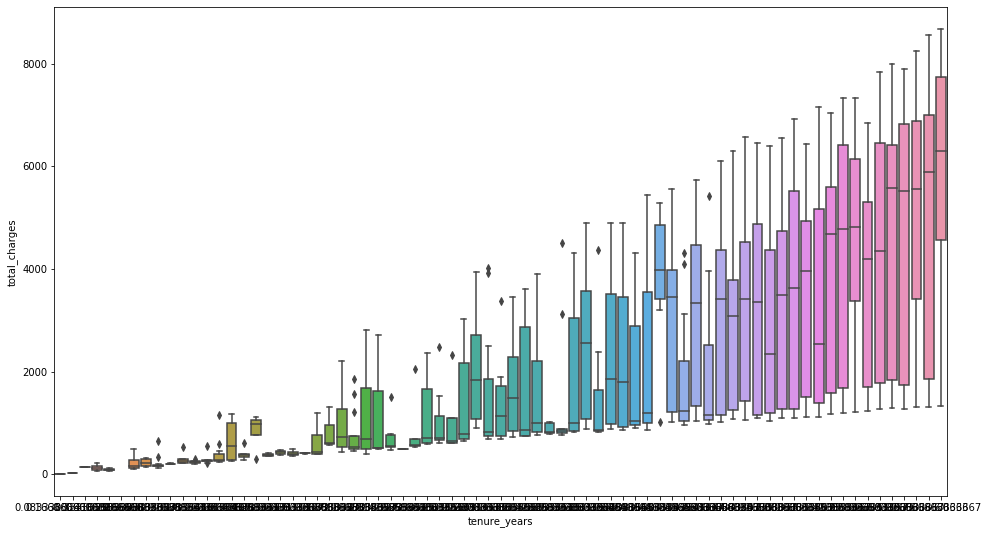

In [59]:
plt.figure(figsize=(16,9))
sns.boxplot(x='tenure_years', y='total_charges', data=train);

In [69]:
months_to_years(df)

,customer_id,monthly_charges,tenure,total_charges,tenure_years
0,0013-SMEOE,109.70,71,7904.25,5
1,0014-BMAQU,84.65,63,5377.80,5
2,0016-QLJIS,90.45,65,5957.90,5
3,0017-DINOC,45.20,54,2460.55,4
4,0017-IUDMW,116.80,72,8456.75,6
...,...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40,5
1691,9972-EWRJS,19.25,67,1372.90,5
1692,9975-GPKZU,19.75,46,856.50,3
1693,9993-LHIEB,67.85,67,4627.65,5


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 5 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null float64
tenure_years       1695 non-null category
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 68.2+ KB


In [71]:
train, test = split_scale.split_my_data(df, .8)

In [72]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
1134,6749-UTDVX,103.65,72,7634.8,6
443,2676-SSLTO,66.15,49,3199.0,4
532,3258-SYSWS,113.80,72,7845.8,6
414,2511-ALLCS,24.30,35,821.6,2
594,3580-HYCSP,110.30,72,7966.9,6


In [91]:
def plot_categorical_and_continuous_vars(categorical_var, continuous_var, df):
    xvals=categorical_var
    yvals=continuous_var
    plt.figure(figsize=(16,9))
    plt.subplot(1,3,1)
    p1 = sns.boxenplot(x=xvals, y=yvals, data=df)
    plt.subplot(1,3,2)
    p2 = sns.scatterplot(x=xvals, y=yvals, data=df)
    plt.subplot(1,3,3)
    p3 = sns.stripplot(x=xvals, y=yvals, data=df)
    plt.show()

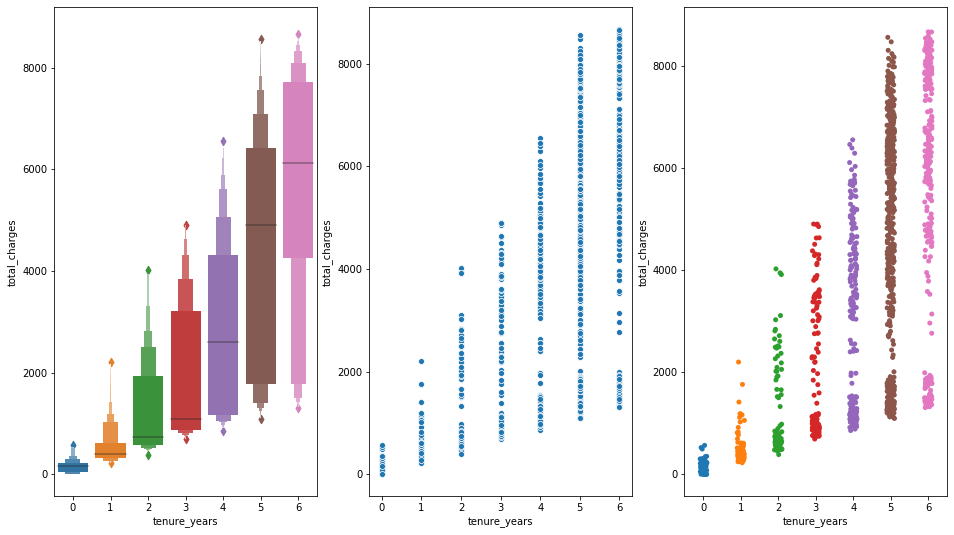

In [92]:
plot_categorical_and_continuous_vars(train.tenure_years, train.total_charges, df)